# Installing required libraries

In [34]:
# %pip install numpy
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install scipy

In [35]:
from preprocessor.sklearn_preprocessor import preprocess_data
from featureEngineering.Visualizer import Visualizer
from featureEngineering.FeatureSelection import FeatureSelection

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [36]:
path = './data/'
data = pd.read_csv(path + 'train.csv')

In [37]:
print(f'Số lượng dòng của data: {len(data)}')
print(data.columns)

Số lượng dòng của data: 1647
Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


In [38]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   object 
 12  Max Power           1582 non-null   object 
 13  Max Torque          1582 non-null   object 
 14  Drivetrain          1536 non-null   object 
 15  Length              1595 non-null   float64
 16  Width 

# I. Preprocessing Data

## 1. Cleaning data


In [40]:
data.dropna(how='all')
data.drop_duplicates()

data["Engine"] = data["Engine"].str.replace(' cc', '', regex=False).astype(float)

data[['Max Power BHP', 'Max Power RPM']] = data['Max Power'].str.extract(r'(\d+)\s*bhp\s*@\s*(\d+)\s*rpm')
data['Max Power BHP'] = pd.to_numeric(data['Max Power BHP'], errors='coerce')
data['Max Power RPM'] = pd.to_numeric(data['Max Power RPM'], errors='coerce')

data[['Max Torque Nm', 'Max Torque RPM']] = data['Max Torque'].str.extract(r'(\d+)\s*Nm\s*@\s*(\d+)\s*rpm')
data['Max Torque Nm'] = pd.to_numeric(data['Max Torque Nm'], errors='coerce')
data['Max Torque RPM'] = pd.to_numeric(data['Max Torque RPM'], errors='coerce')

data = data.drop('Max Power', axis=1)
data = data.drop('Max Torque', axis=1)

spltio


In [41]:
data["Drivetrain"].value_counts()

Drivetrain
FWD    1062
RWD     255
AWD     219
Name: count, dtype: int64

In [42]:
data["Fuel Type"].value_counts()

Fuel Type
Diesel          839
Petrol          756
CNG              38
Electric          5
LPG               4
Hybrid            3
CNG + CNG         1
Petrol + LPG      1
Name: count, dtype: int64

In [43]:
# Get the unique values before making changes
print("Unique values before:", data["Fuel Type"].unique())

# Replace less common fuel types with 'Others'
rare_fuel_types = ['Electric', 'LPG', 'Hybrid', 'CNG + CNG', 'Petrol + LPG']
data["Fuel Type"] = data["Fuel Type"].apply(lambda x: 'Others' if x in rare_fuel_types else x)

# Check the unique values after making changes
print("Unique values after:", data["Fuel Type"].unique())

Unique values before: ['Diesel' 'Petrol' 'CNG' 'LPG' 'CNG + CNG' 'Electric' 'Hybrid'
 'Petrol + LPG']
Unique values after: ['Diesel' 'Petrol' 'CNG' 'Others']


## 2. Adding Interaction Terms

## 3. Splitting and preprocessing

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1647 entries, 0 to 1646
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1647 non-null   object 
 1   Model               1647 non-null   object 
 2   Price               1647 non-null   int64  
 3   Year                1647 non-null   int64  
 4   Kilometer           1647 non-null   int64  
 5   Fuel Type           1647 non-null   object 
 6   Transmission        1647 non-null   object 
 7   Location            1647 non-null   object 
 8   Color               1647 non-null   object 
 9   Owner               1647 non-null   object 
 10  Seller Type         1647 non-null   object 
 11  Engine              1582 non-null   float64
 12  Drivetrain          1536 non-null   object 
 13  Length              1595 non-null   float64
 14  Width               1595 non-null   float64
 15  Height              1595 non-null   float64
 16  Seatin

In [45]:
# Apply preprocessing
train_df, val_df, test_df, preprocessor = preprocess_data(
    data=data,
    save_path='./processed_data/',
    train_ratio=0.7,
    val_ratio=0.15,
    test_ratio=0.15,
)

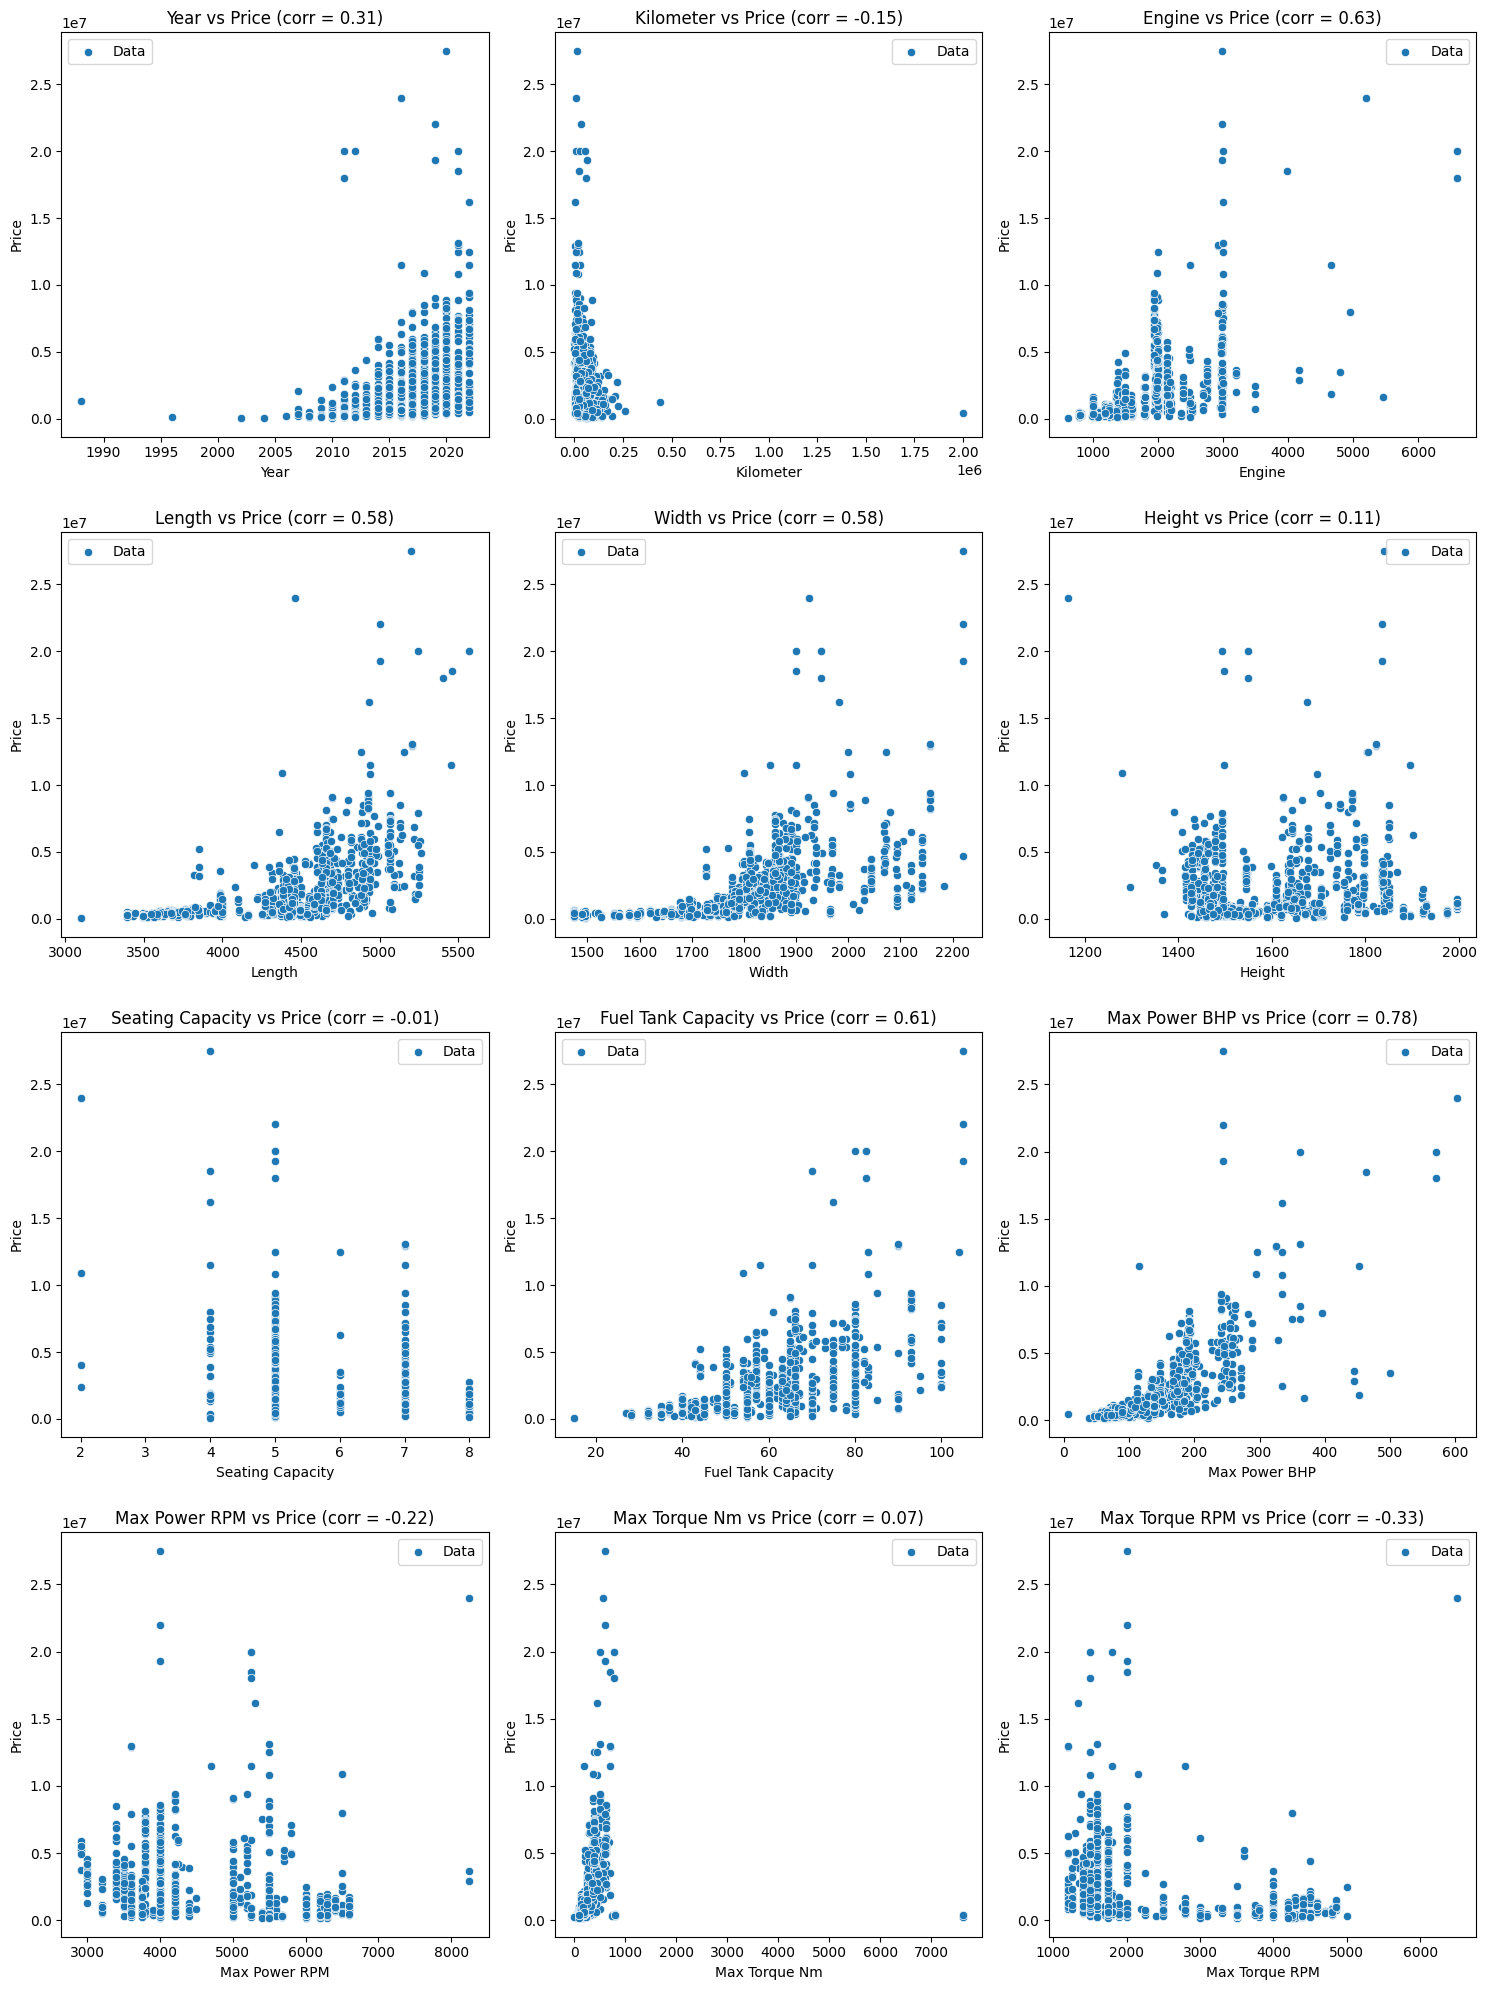

In [46]:
Visualizer.target_feature_scatterplots(data, 'Price')

In [47]:
### Insert feature engineer code 
### For simplicity, just choose all features, drop Make, Model and standard hypothesis model
drop_columns = ['Make', 'Model', 'Location', 'Color']
train_df = train_df.drop(drop_columns, axis=1)
val_df = val_df.drop(drop_columns, axis=1)
test_df = test_df.drop(drop_columns, axis=1)

# Check if there are any columns with object type in the transformed dataframes
print("Train DataFrame Object Types:", train_df.select_dtypes(include=['object']).columns.tolist())
print("Val DataFrame Object Types:", val_df.select_dtypes(include=['object']).columns.tolist())
print("Test DataFrame Object Types:", test_df.select_dtypes(include=['object']).columns.tolist())

# If there are object columns, convert them to numeric
for df in [train_df, val_df, test_df]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col])

# Verify the conversion worked
print("\nAfter conversion:")
print("Train DataFrame Types:", train_df.dtypes.value_counts())
print("Val DataFrame Types:", val_df.dtypes.value_counts())
print("Test DataFrame Types:", test_df.dtypes.value_counts())

Train DataFrame Object Types: ['Price', 'Year', 'Kilometer', 'Max Power RPM', 'Max Torque RPM', 'Owner', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Fuel Type_Diesel', 'Fuel Type_Others', 'Fuel Type_Petrol', 'Seller Type_Corporate', 'Seller Type_Individual', 'Transmission_Manual', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power BHP', 'Max Torque Nm']
Val DataFrame Object Types: ['Price', 'Year', 'Kilometer', 'Max Power RPM', 'Max Torque RPM', 'Owner', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Fuel Type_Diesel', 'Fuel Type_Others', 'Fuel Type_Petrol', 'Seller Type_Corporate', 'Seller Type_Individual', 'Transmission_Manual', 'Engine', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power BHP', 'Max Torque Nm']
Test DataFrame Object Types: ['Price', 'Year', 'Kilometer', 'Max Power RPM', 'Max Torque RPM', 'Owner', 'Drivetrain_FWD', 'Drivetrain_RWD', 'Fuel Type_Diesel', 'Fuel Type_Others', 'Fuel Type_Petrol', 'Seller Type_Corporate

# II. Modeling

In [48]:
oneHotCols = ['Drivetrain', 'Fuel Type', 'Seller Type', 'Transmission']

In [49]:
from modelling.Model import StandardRegression

model_type = StandardRegression
model = model_type()
train_df = model.transform_features(train_df)
val_df = model.transform_features(val_df)
test_df = model.transform_features(test_df)

model.fit(train_df.drop('Price', axis=1), train_df['Price'])
print('Train', model.score_log(train_df.drop('Price', axis=1), np.exp(train_df['Price'])))
print('Val', model.score_log(val_df.drop('Price', axis=1), np.exp(val_df['Price'])))
print('Test', model.score_log(test_df.drop('Price', axis=1), np.exp(test_df['Price'])))

Train 0.8254445290034236
Val 0.8540705829651789
Test 0.9115598191130908


In [50]:
subcols = train_df.drop(columns='Price').columns.tolist()

In [51]:
# subcols, mse = FeatureSelection.forward_selection_mse(
#     train_df[subcols + ['Price']],
#     oneHotCols=oneHotCols,
#     target='Price',
#     model_type=model_type
# )
# print(subcols)
# print('mse on transformed target:', mse)
# set(train_df.columns.to_list()) - set(subcols)

In [52]:
# subcols, mae = FeatureSelection.forward_selection_mae(
#     train_df[subcols + ['Price']],
#     oneHotCols=oneHotCols, 
#     target='Price',
#     model_type=model_type
# )
# print(subcols)
# print('mae on transformed target:', mae)
# set(train_df.columns.to_list()) - set(subcols)

In [53]:
# subcols, r2 = FeatureSelection.forward_selection_r2(
#     train_df[subcols + ['Price']],
#     oneHotCols=oneHotCols,
#     target='Price',
#     model_type=model_type
# )
# print(subcols)
# print('Adjusted log r^2 on transformed target:', r2)
# set(train_df.columns.to_list()) - set(subcols)

In [54]:
# if len(subcols) < 20:
#     subcols, r2 = FeatureSelection.subset_selection(
#         train_df[subcols + ['Price']],
#         val_df[subcols + ['Price']],
#         target='Price',
#         model_type=model_type,
#         oneHotCols=oneHotCols,
#         min_feat=10
#     )
#     print(subcols)
#     print('Adjusted log r^2 on transformed target:', r2)
# set(train_df.columns.to_list()) - set(subcols)

In [55]:
eliminate_features = []
subcols = list(set(subcols) - set(eliminate_features))

In [56]:
model.fit(train_df[subcols], train_df['Price'])
y_train = np.exp(train_df['Price'])
y_val = np.exp(val_df['Price'])
y_test = np.exp(test_df['Price'])
y_train_pred = np.exp(model.predict(train_df[subcols]))
y_val_pred = np.exp(model.predict(val_df[subcols]))
y_test_pred = np.exp(model.predict(test_df[subcols]))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Train r^2: ', r2_score(y_train, y_train_pred))
print('Train MAE: ', f"{mean_absolute_error(y_train, y_train_pred):.3e}")
print('Train MSE: ', f"{mean_squared_error(y_train, y_train_pred):.3e}")

print('Val r^2: ', r2_score(y_val, y_val_pred))
print('Val MAE: ', f"{mean_absolute_error(y_val, y_val_pred):.3e}")
print('Val MSE: ', f"{mean_squared_error(y_val, y_val_pred):.3e}")

print('Test r^2: ', r2_score(y_test, y_test_pred))
print('Test MAE: ', f"{mean_absolute_error(y_test, y_test_pred):.3e}")
print('Test MSE: ', f"{mean_squared_error(y_test, y_test_pred):.3e}")

Train r^2:  0.8254445290020692
Train MAE:  3.757e+05
Train MSE:  1.119e+12
Val r^2:  0.8540705829645572
Val MAE:  2.890e+05
Val MSE:  3.769e+11
Test r^2:  0.9115598191134788
Test MAE:  3.375e+05
Test MSE:  4.601e+11


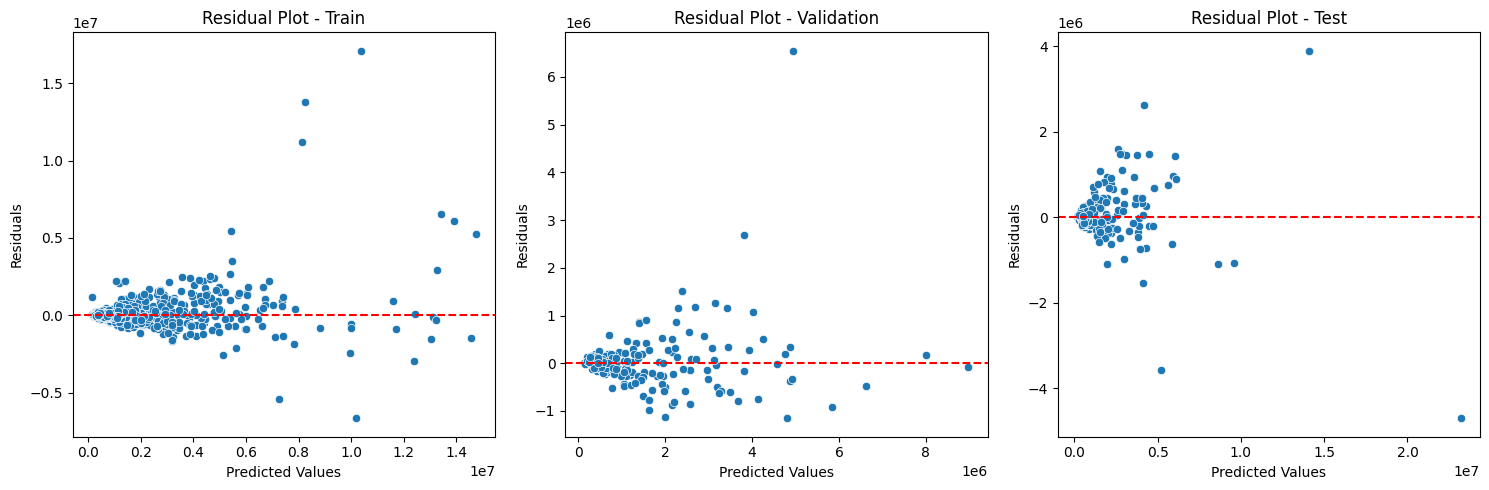

In [58]:
Visualizer.residual_plot([y_train, y_train_pred], [y_val, y_val_pred], [y_test, y_test_pred])

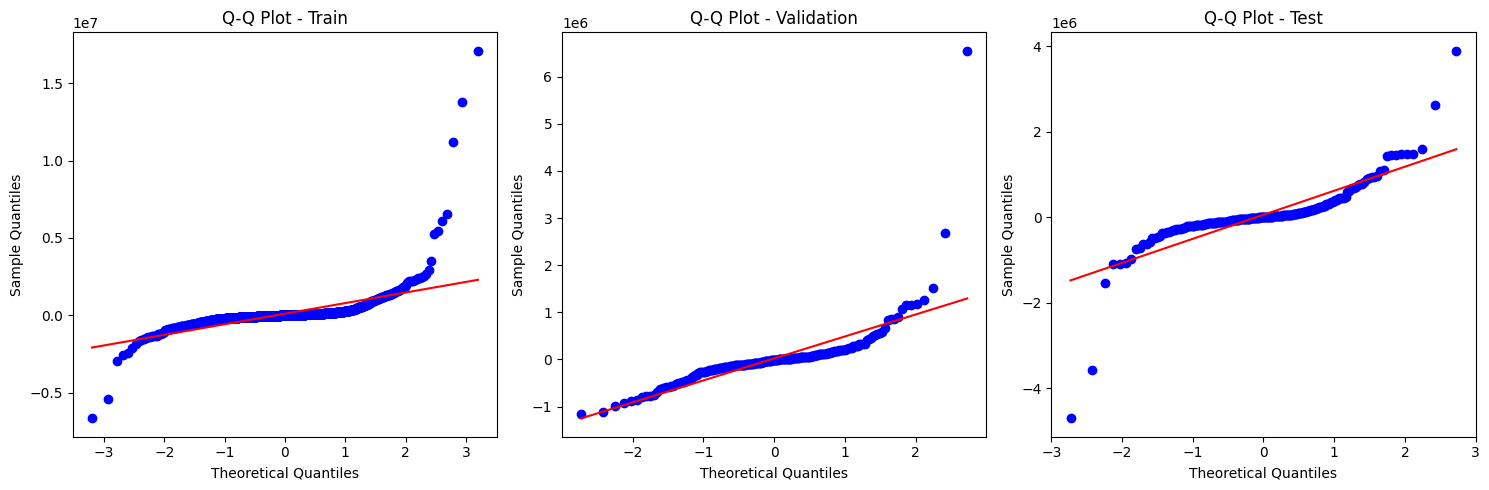

In [59]:
Visualizer.qq_plot((y_train, y_train_pred), (y_val, y_val_pred), (y_test, y_test_pred))

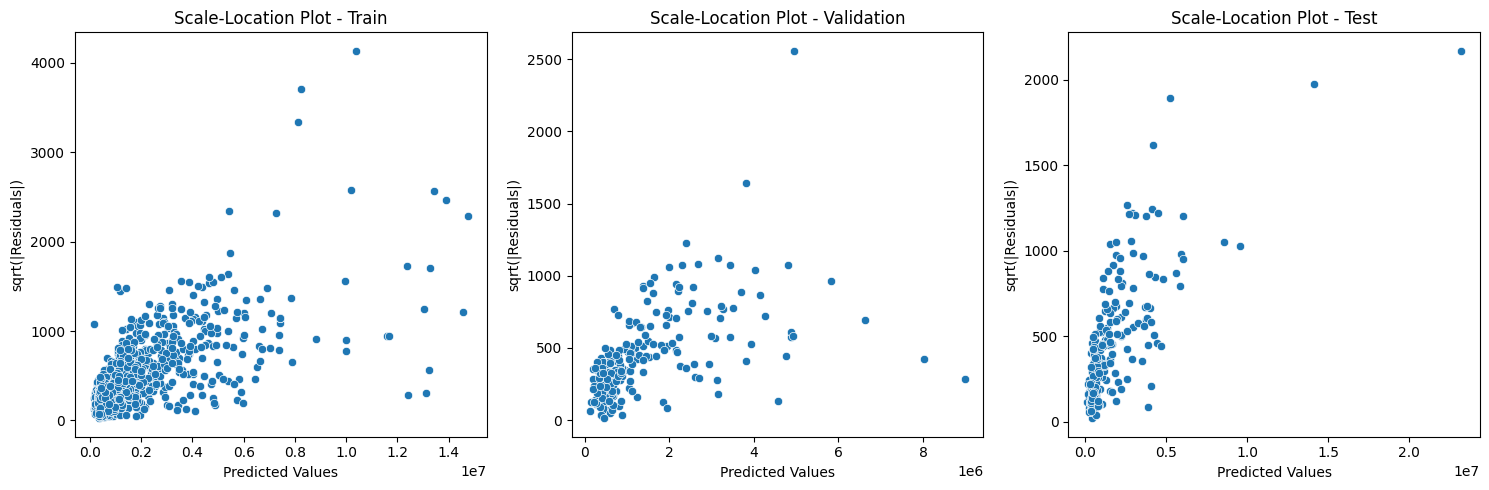

In [60]:
Visualizer.scale_location_plot((y_train, y_train_pred), (y_val, y_val_pred), (y_test, y_test_pred))